# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 2: kNN and Linear Regression

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'>
<div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>Overall
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Great job! You are showing good skills and have a critical mind. To improve the quality of your code, remove useless parts of your code.
</span></div>
</div>

Group members - Oluwatosin Alliyu & Larissa Little 

In [52]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [53]:
#RUN THIS CELL
import os
import pathlib
working_dir = pathlib.Path().absolute()
os.chdir(working_dir)

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs, and it is encouraged for you to do so. Especially during covid and distancing, this can be a way to work with other students and learn alongside one another. As future data scientists, you will often be expected to work with others, and working in pairs can help practice communicating data science concepts.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them. .
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```

<hr style="height:2pt">

<div class="theme"> Overview </div> 

This assignment is the first where you will go through the process of loading a dataset, splitting it in train and test sets, 
pre-processing it, and finally using it to run models and evaluating your results. 

We have two different datasets, one with car data in **Part 1** and another with data from an Indian matrimonial web site in **Part 2**.

For part 1, you will explore two simple methods for prediction,  **k-nearest neighbors regression (kNN)**, a *non-parametric* method, and **linear regression**, a *parametric* method. As you move towards Part 2 of the homework, you will work with multiple linear and polynomial regression.

<div style="color: red; background: black">Please note that Question 4 and Question 7 are required for 209a students but are <strong>optional for 109a students</strong>. We include them here for your education, and we believe that if you have time to spend with them you will learn from them. But <strong>if you are in 109a, then Q4 and Q7 are completely optional</strong>. To help manage stress if you are not in 209a, we recommend skipping past these first and then coming back to them once you have finished the rest of the homework if you have time.</div>

In [54]:
#!pip install seaborn

In [55]:
#Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# pandas tricks for better display
pd.options.display.max_columns = 50  
pd.options.display.max_rows = 500     
pd.options.display.max_colwidth = 100
pd.options.display.precision = 3

# Part 2 imports 
from scipy.stats import norm
from sklearn.preprocessing import PolynomialFeatures

In [56]:
# Run this cell for more readable visuals 
large = 22; med = 16; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'axes.linewidth': 2,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.style.use('seaborn-whitegrid')
plt.rcParams.update(params)
#sns.set_style("white")
%matplotlib inline

<div class="theme"> Part A: k-NN and Linear Regression</div> 

### Problem Description: Predicting the Selling Price of Cars on CarDekho.com

According to its website, **CarDekho.com** is India's leading car search venture. 
Its website and app carry rich automotive content such as expert reviews, 
detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. 
Each car has a **Current selling price**, which is the price for buying the car on this site, and a **MRP**, 
which is the retail price of the car. These two prices differ depending on factors such as brand, 
make year, millage, condition, etc.  

#### Data set 

The dataset contains 601 cars and is in file `car_dekho_full.csv`. It contains the following columns:

- **Year** - make year (year the car was made), 
- **Current_Selling_Price** - current price of a car on CarDekho.com (in lakhs),
- **MRP** - maximum retail price of a car (in lakhs). 
- **Kms_Driven** - number of kilometers

Note: 1 *lakh*  is 100,000 Rupees in the Indian numbering system. Also, kilometers are used as a measure of distance instead of miles.

#### Your Task: 
Predict the `Current_Selling_Price` from the other features.

<div class='exercise'><b> Question 1:   Exploratory Data Analysis (EDA) [10 pts]</b>

To reach the goal of predicting the `Current_Selling_Price`, start by inspecting the dataset using Exploratory Data Analysis (EDA).

Load the dataset, inspect it and answer the following questions: 

**1.1** Which variables are quantitative, and which are categorical? 

**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`? 

**1.3** What is the range of Kilometers that the cars have?

**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`? 
    
    
Note: In general, it is always good to label your axes, title your graphs, and produce visuals which clearly communicate the data. Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data. 
</div>

## Solutions 

<div class='exercise-r'>  
 
**1.1** Which variables are quantitative, and which are categorical?
 
 </div>

In [57]:
cars = pd.read_csv('data/car_dekho_full.csv')
cars.head()

,Year,Current_Selling_Price,MRP,Kms_Driven
0,2016,5.25,5.70,3493
1,2005,3.51,13.70,75000
2,2010,0.31,1.05,213000
3,2006,2.10,7.60,50456
4,2005,0.20,0.57,55000


In [58]:
print("Year is a categorical data in that it is not continuous, but it is ordered. "
      "Selling price, max retail price, and kilometers driven are "
      "all quantitative variables")

Year is a categorical data in that it is not continuous, but it is ordered. Selling price, max retail price, and kilometers driven are all quantitative variables


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>1.1
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Year could be also quantitative
</span></div></div>

<div class='exercise-r'>  
 
**1.2** What are the means and standard deviations for `Current_Selling_Price` and `MRP`?
 
 </div>

In [59]:
# name your variables mean_csp, mean_mrp, std_csp, std_mrp
# your code here
mean_csp = cars["Current_Selling_Price"].mean()
mean_mrp = cars["MRP"].mean()
std_csp = cars["Current_Selling_Price"].std()
std_mrp = cars["MRP"].std()

print(f"The mean selling price is {mean_csp:.2f} lakhs with a standard deviation of {std_csp:.2f}."
      f"The mean maximum retail price is {mean_mrp:.2f} lakhs with a standard deviation of {std_mrp:.2f}.")

The mean selling price is 4.39 lakhs with a standard deviation of 4.52.The mean maximum retail price is 6.91 lakhs with a standard deviation of 6.48.


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>1.2
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>good to show the units!
</span></div></div>

<div class='exercise-r'>  
 
**1.3** What is the range of Kilometers that the cars have?
 
 </div>

In [60]:
#print(f"The car with the lowest number of Km on it has {df.loc['min','Kms_Driven']} km. "
     #f"The car with the highest number of Km on it has {df.loc['max', 'Kms_Driven']} km.")
    
min_km = cars["Kms_Driven"].min()
max_km = cars["Kms_Driven"].max()

print(f"The car with the lowest number of Km on it has {min_km} km. "
     f"The car with the highest number of Km on it has {max_km} km.")

The car with the lowest number of Km on it has 500 km. The car with the highest number of Km on it has 213000 km.


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>1.3
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>The range is the difference of this two numbers.
</span></div><div class='alert alert-block alert-danger'><b>Deduction : </b><span style = 'color:black'>-1</span></div></div>

<div class='exercise-r'>  
 
**1.4** The goal of this part is to identify the best variable from which to predict our respone variable `Current Selling Price`. Plot a scatter plot between each predictor and reponse variable and examine the relationship between the predictors and `Current_Selling_Price`. Based on the plots, which is the  predictor that visually seems to best predict the `Current_Selling_Price`?
 
 
 Note: In general, it is always good to label your axes, title your graphs, and produce visuals which clearly communicate the data. Visuals should often be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.
 </div>

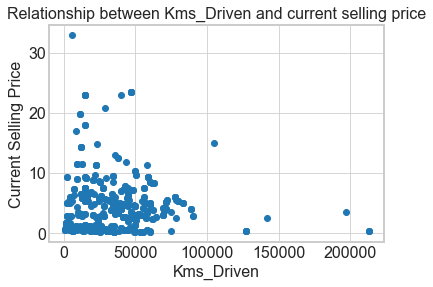

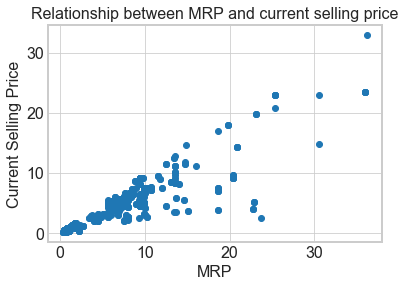

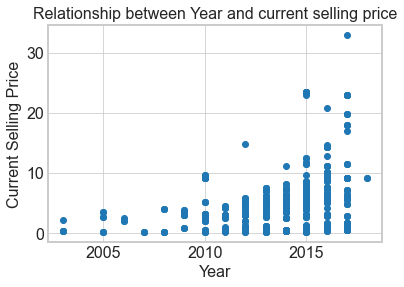

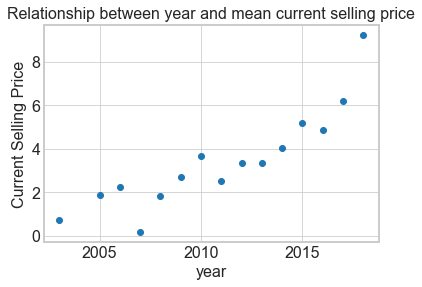

In [61]:
y = cars['Current_Selling_Price']
for x in ['Kms_Driven', 'MRP', 'Year']:
    plt.figure()
    plt.xlabel(x)
    plt.title(f"Relationship between {x} and current selling price")
    plt.ylabel("Current Selling Price")
    plt.scatter(cars[x],y)
    
year_df = cars.groupby(by='Year').mean()
x = "year"
plt.figure()
plt.xlabel(x)
plt.title(f"Relationship between {x} and mean current selling price")
plt.ylabel("Current Selling Price")
plt.scatter(year_df.index, year_df['Current_Selling_Price'])

Based on the graphs above, it seems that the strongest 
predictor of current selling price is maximum retail price, 
although year also seems like a fairly good predictor. Kilometers driven seems to have a slight negative correlation with current selling price, but it is not ver strong. 

Since year is a discrete variable, it is hard to see all of the data points when plotting year vs current selling price. Therefore I chose to also plot the mean selling price for each year. 

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>1.4
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>good! Try to use plt.subplots
</span></div></div>

<div class='exercise'><b> Question 2:   k-Nearest Neighbors [25 pts]</b>

We begin our modeling with k-Nearest Neighbors (kNN) regression. You may use `sklearn`'s built-in functions.

**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.

    
INSTRUCTIONS:
- Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.  
- Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$. 
- Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots. 
- Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
- Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
- Find the best model based on the test $MSE$ values.
- Evaluate and report the $R^2$ of the best model.

**2.2** Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.

- How does the value of $k$ affect the fitted model?

- If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  

- Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.

- Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
    
    </div>

### Solutions

<div class='exercise-r'>  
 
**2.1** In this part, we will model a kNN regression on the predictor chosen above (1.4) and the response variable `Current_Selling_Price`.
 
 
 INSTRUCTIONS:
 - Split the dataset in train and test set with 75% training data and 25% testing data, using the random_state = 109.
 - Fit a kNN regression model to the training set for the following 8 different values of $k$:  $k = 1,2,3,5,7,10,50,100$.
 - Make 8 scatter plots of response vs. predictor for each $k$, arranged in a $4\times2$ grid.  Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend. Consider using the subplot functionality, unless you first try this and then decide that you have a clearer, cleaner way of communicating these plots.
 - Evaluate the $MSE$ for the fitted models on both the training and test sets **for each $k$**.
 - Plot the training and test $MSE$ values as a function of $k$ on the same figure.  Again, the figure must have axis labels and a legend.
 - Find the best model based on the test $MSE$ values.
 - Evaluate and report the $R^2$ of the best model.
 
 </div>

In [62]:
#Choosing your predictor and response variable
# your code here
y = cars["Current_Selling_Price"]
x = cars[["MRP"]]

In [63]:
##Splitting the data into train and test sets with 75% training data and 25% testing data. Set random_state=109
# your code here
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, test_size=0.25,random_state=200)

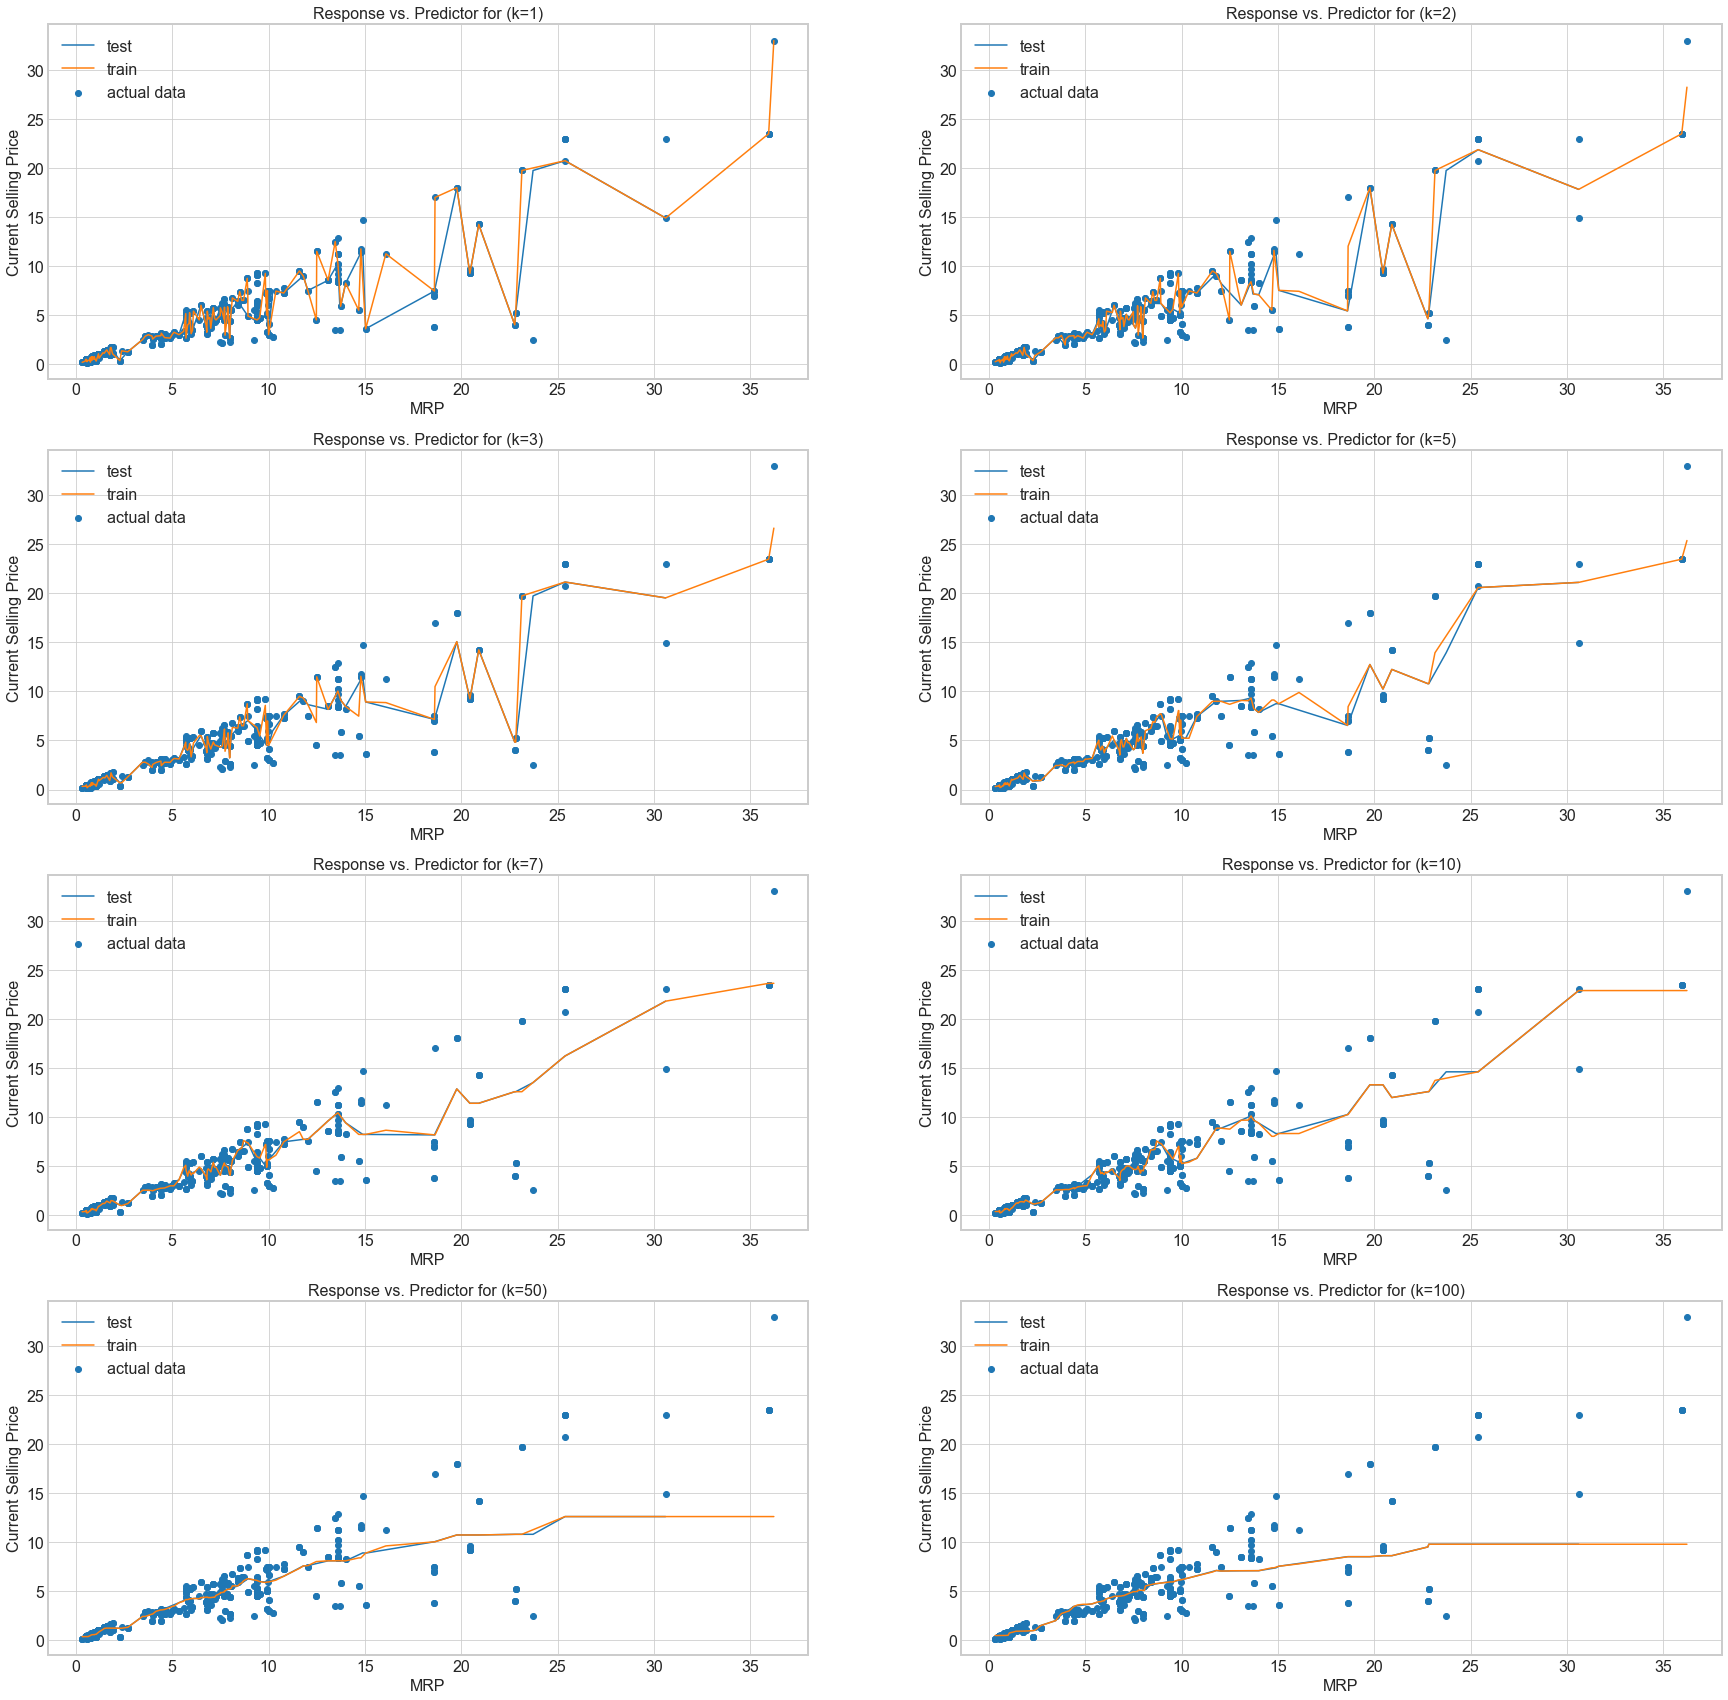

In [64]:
## Fit a kNN regression model to the training set for the following 8 different values of  𝑘 :  𝑘=1,2,3,5,7,10,50,100 .
## and make 8 scatter plots of response vs. predictor for each  𝑘 , arranged in a  4×2  grid. 
## Each figure should have plots of the prediction from the k-NN regression and the actual data points on the same figure, as well as axis labels, title, and legend
# your code here 

k_values = [1,2,3,5,7,10,50,100]


knn_dict = {}

# Looping over k values

fig, axs = plt.subplots(4, 2, figsize = (30,30))
for i, k in enumerate(k_values):   
    
    # creating KNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k))
    
    # fitting model 
    model.fit(x_train, y_train)
   
    #print(x_test)
    x_test = x_test.sort_values('MRP')
    x_train =x_train.sort_values('MRP')
    
    #x_test = x_test.sort_values(by='MRP')    
    y_test = y_test.loc[x_test.index]
    y_train = y_train.loc[x_train.index]
    
    # predictions
    y_test_pred = model.predict(x_test)
    y_train_pred = model.predict(x_train)
    
    # Calculating MSE 
    MSE_test = mean_squared_error(y_test, y_test_pred)
    MSE_train = mean_squared_error(y_train, y_train_pred)
    #print(y_pred.shape, y_train.shape, y_test.shape)

    
    #Storing the MSE values of each k value in a dictionary
    knn_dict[k] = [MSE_test, MSE_train]
    
    axs[int(i/2), i%2].plot(x_test, y_test_pred, label="test")
    axs[int(i/2), i%2].plot(x_train, y_train_pred, label="train")
    axs[int(i/2), i%2].scatter(x, y, label = 'actual data')
    axs[int(i/2), i%2].legend()
    axs[int(i/2), i%2].set_title("Response vs. Predictor for (k={})".format(k))
    axs[int(i/2), i%2].set_xlabel("MRP")
    axs[int(i/2), i%2].set_ylabel("Current Selling Price")


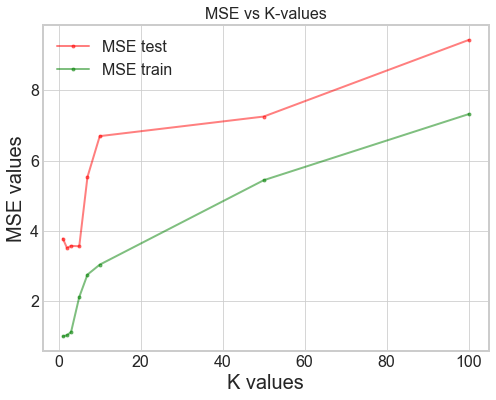

In [65]:
# Now make MSE plots
# your code here
plt.figure(figsize=[8,6])
plt.plot(list(knn_dict.keys()), [x[0] for x in knn_dict.values()],'r.-',alpha=0.5,linewidth=2,label="MSE test")
plt.plot(list(knn_dict.keys()), [x[1] for x in knn_dict.values()],'g.-',alpha=0.5,linewidth=2,label="MSE train")
plt.xlabel('K values',fontsize=20)
plt.ylabel('MSE values',fontsize = 20)
plt.title("MSE vs K-values")
plt.legend()

In [66]:
# Find the best model
# your code here

test_mse = [x[0] for x in knn_dict.values()]
#print(test_mse)
min_mse = min(test_mse)
best_model = [k for k, v in knn_dict.items() if min_mse in v]   
#print(best_model)
print ("The best k value is ",best_model[0],"with a MSE of ", min_mse)


The best k value is  2 with a MSE of  3.515562417218543


In [67]:
##Compute the R-squared for the best model
# your code here
model = KNeighborsRegressor(n_neighbors=best_model[0])
model.fit(x_train,y_train)
y_pred_test = model.predict(x_test)

r_sq = r2_score(y_test, y_pred_test)

print("The R2 score for your model is {:.3}".format(r_sq))


The R2 score for your model is 0.846


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>2.1
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Careful the knn plot should be a step function. Please compare the code of your first plots with the solution.
</span></div><div class='alert alert-block alert-danger'><b>Deduction : </b><span style = 'color:black'>-4</span></div></div>

We chose a seed of 200 here because 109 was giving the test set with a lower MSE than the train set, which is unusual is not how the model should normally behave.

<div class='exercise-r'>  
 
**2.2** Discuss your results by answering the following questions.  You should answer the questions directly in a markdown cell of your notebook.
 
 - How does the value of $k$ affect the fitted model?
 
 - If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?
 
 - Do the training and test $MSE$ plots exhibit different trends?  Explain how the value of $k$ influences the training and test $MSE$ values.
 
 - Run the same code by changing the random seed during the train-test split. Do you always get the same answer? If not, why?
 
 </div>

*Your answer here*
- as k reduces there is more noise, since k is the number of nearest neighbors the model will fit to.
- If k = n, then the model would be the mean of the data points, so there would be no dependence on the predictor variable.
- The training set intially has low MSE values but as the k value increases, the MSE values increasingly becomes worse. On the other hand, the test set initally has higher MSE values, then it drops, then increases again. Overall, as k value increases, the MSE values as incluease, however the training set has better values than the test set. 
- No, because the train-test split is getting different subsets of the data each time. 

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>2.2
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>you could have mention over/underfitting. Please look at the solution
</span></div><div class='alert alert-block alert-danger'><b>Deduction : </b><span style = 'color:black'>-1</span></div></div>

<div class='exercise'><b> Question 3:  Simple Linear Regression [25 pts]</b>

**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.

- You will use the same 75% training and 25% testing split of the data, using the same random_state = 109. 
- Run a Linear Regression model.
- Report the slope/coefficient and intercept values for the fitted linear model.
- Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
- Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis.

**Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
    
**3.2** Discuss your results by answering the following questions.  

- How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression? 

- What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?

- Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.
    </div>


### Solutions

<div class='exercise-r'>  
 
**3.1** We will now fit our data using a linear regression model. Choose the same **predictor** and **response** variables used to model kNN regression.
 
 - You will use the same 75% training and 25% testing split of the data, using the same random_state = 109.
 - Run a Linear Regression model.
 - Report the slope/coefficient and intercept values for the fitted linear model.
 - Report the $MSE$ for the training and test sets and the $R^2$ from the test set.
 - Plot the **residuals** $e = y - \hat{y}$ of the model on the training set as a function of the response variable. Draw a horizontal line denoting the zero residual value on the Y-axis.
 
 **Note:** Use the `sklearn` module for linear regression. This module has built-in functions to summarize the results of regression and produce residual plots. Create a `Linear Regression` model, use the `fit` method in the instance for fitting a linear regression model, and use the `predict` method to make predictions. As previously, you may use the `mean_squared_error` function to compute $MSE$.
 
 </div>

In [68]:
# Prepare your data
# your code here
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, test_size=0.25,random_state=109)


In [69]:
## Fit a linear model to the train data
# your code here
model = LinearRegression()

model.fit(x_train, y_train)

# Now predict on the test set

y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train) 

In [70]:
## Report the slope/coefficient and intercept values for the fitted linear model. 
# your code here
dintercept = model.intercept_
dslope = model.coef_[0]
#print(dintercept, dslope)
print(f'The slope is {dslope:.2f} and the intercept is {dintercept:.2f}.')


The slope is 0.62 and the intercept is 0.11.


In [71]:
## Report the $MSE$ and $R^2$ from the training and test sets.
# your code here 
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r_sq_test = model.score(x_test, y_test)
r_sq_train = model.score(x_train, y_train)
print('The test MSE is {:.2f} and the MSE value for the train set is {:.2f}. \
The r-squared value for the test set is {:.2f} and for the train value is {:.2f}.'
      .format(mse_test, mse_train, r_sq_test, r_sq_train))


The test MSE is 3.14 and the MSE value for the train set is 4.71. The r-squared value for the test set is 0.81 and for the train value is 0.78.


Text(0, 0.5, 'Residual (lakhs)')

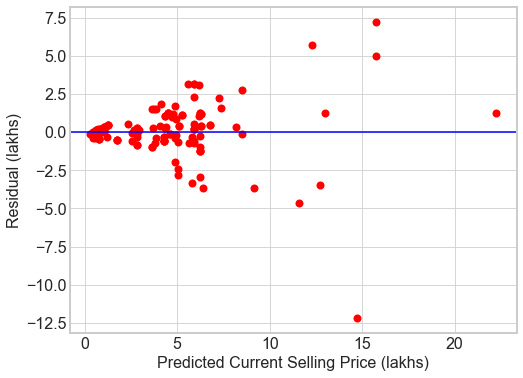

In [72]:
## Plot the **residuals** 
# your code here 
residual = np.subtract(y_test, y_pred_test)
fig, ax = plt.subplots(figsize=[8,6])

#ax.scatter(x,y,label='data points')
ax.scatter(y_pred_test, residual,color='red',linewidth=2)
ax.axhline(y=0, color='b', linestyle='-')
ax.set_xlabel('Predicted Current Selling Price (lakhs)')
ax.set_ylabel('Residual (lakhs)')

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>3.1
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Good job! Please compare with the solution for the residual plot.
</span></div>
</div>

<div class='exercise-r'>  
 
**3.2** Discuss your results by answering the following questions.
 
 - How does the test $MSE$ score compare with the best test $MSE$ value obtained with k-NN regression?
 
 - What does the sign of the slope of the fitted linear model convey about the relationship between the predictor and the response?
 
 - Discuss the shape of the residual plot and what it shows for the quality of the model. Be sure to discuss whether or not the assumption of linearity is valid for this data.
 </div>

*Your answer here*
- The MSE value obtained with linear regression is a bit better than the one value calculated in kNN regression, but they are similar
- The sign of the slope conveys that as MRP increases, current selling price also increases
- The residual plot is random with points mainly congregating in the middle. The non random nature suggests that the linear model is an appropriate fit for the data. Although the residuals get larger with the predicted selling price, they are still centered around zero, so linear model seems appropriate.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>3.2
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Good interpretation, although on the residual plot std increases with the absis variable.
</span></div>
</div>

<div class='exercise'><b> Question 4 (for 209a students, optional for others):  Linear Regression with Feature engineering [10 pts]</b>

**4.1** Creating a new variable from existing data: percentage depreciation

Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data. 

Our previous regression model relates the Current selling price to the MRP of the car with the equation:

$$CSP = \beta_0 + \beta_1*MRP$$

However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which may be important factors that affect the overall price of the car. 

Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.

From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)). 

Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.  

Define the percentage depreciation of the Current selling price to the MRP as follows:

$$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
    
Create a new column in your dataframe for `perc`
    
    
**4.2** Exploratory Data Analysis

For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.

Answer the following questions by plotting graphs.

a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so?

b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?

c) Does there seem to be a relationship between `Kms_Driven` and `perc` ? 

d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?

**4.3** Perform additional EDA 

Use other plots and statistics to find the best predictor and/or understand the relationship between the other variables and `perc`. One example is given below. It is a plot of `perc` vs `Year` that is color coded based on the `Kms_Driven`.

**4.4** Fitting a Linear Regression model

Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable (`perc`).

- Again, use the same split train-test sets with training data of 75% and testing data of 25%
- Fit a Linear Regression model for each of the predictors.
- Predict the model for the train and test data
- Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
- Report the $MSE$ score from the training and test sets.
- Find the best model i.e. the best predictor based on the $MSE$ of each model.

**4.5** Predicting The Current Selling Price using ```perc``` 

After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score.
    
 </div>

## Solutions

<div class='exercise-r'>  
 
**4.1** Creating a new variable from existing data: percentage depreciation
 
 Feature engineering involves transforming data into features that better represent the underlying problem to the predictive models. This results in improved model accuracy on unseen data.
 
 Our previous regression model relates the Current selling price to the MRP of the car with the equation:
 
 $$CSP = \beta_0 + \beta_1*MRP$$
 
 However, this linear equation does not incorparate other interesting variables such as the ```year of manufacture```, or the ```kms driven```, which may be important factors that affect the overall price of the car.
 
 Instead of using multi-linear analysis, we can perform some intelligent feature engineering to identify other simple linear relationships within our data.
 
 From practical experience, we know that the percentage drop of a car's price is proportional to the age of the car ([more on car depreciation here](https://www.finder.com/what-is-car-depreciation)).
 
 Hence, it makes sense to investigate this variable seperately and try to identify possible relationships with other variables.
 
 Define the percentage depreciation of the Current selling price to the MRP as follows:
 
 $$\textrm{Percentage of the Selling Price}=perc =\frac{MRP - Selling Price}{MRP}$$
 
 Create a new column in your dataframe for `perc`
 
 
 </div>

In [73]:
# your code here
cars["perc"] = (cars["MRP"]-cars["Current_Selling_Price"])/cars["MRP"]
cars.head()


,Year,Current_Selling_Price,MRP,Kms_Driven,perc
0,2016,5.25,5.70,3493,0.079
1,2005,3.51,13.70,75000,0.744
2,2010,0.31,1.05,213000,0.705
3,2006,2.10,7.60,50456,0.724
4,2005,0.20,0.57,55000,0.649


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>4.1
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>good
</span></div>
</div>

<div class='exercise-r'>  
 
**4.2** Exploratory Data Analysis
 
 For this section, we will consider `perc` to be our intermediate response variable. To understand the relationship between `perc` and our predictor variables we will perform EDA.
 
 Answer the following questions by plotting graphs.
 
 a) It is seen previosuly that there is a relationship between `Year` and `Current Selling Price`. Is the relationship between `Years` and `perc` the same. If not, how has it changed and why do you think so?
 
 b) Is the trend between the `MRP` and `perc` the same as that between `MRP` and `Current Selling Price`?
 
 c) Does there seem to be a relationship between `Kms_Driven` and `perc` ?
 
 d) Which is the best predictor to predict `perc`, if there is one? Is it the same as that of `Current Selling price` or has it changed?
 
 </div>

a)

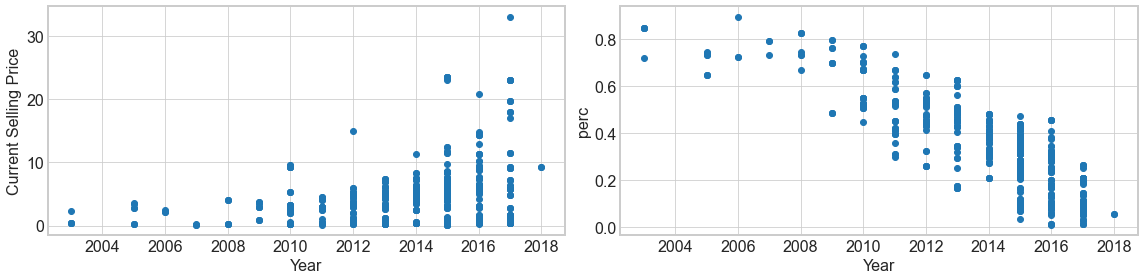

In [74]:
# your code here
# your code here
fig, (ax2, ax1) = plt.subplots(1,2, figsize=(16, 4))
ax1.scatter(cars["Year"], cars["perc"],label='data points')
ax1.set_xlabel('Year')
ax1.set_ylabel('perc')
#ax1.legend()

ax2.scatter(cars["Year"], cars["Current_Selling_Price"],label='data points')
ax2.set_xlabel('Year')
ax2.set_ylabel('Current Selling Price')
#ax2.legend()


fig.tight_layout()


The relationship between Year and perc has an inverse linear relationship which highlights that the newer the car the lower the percentage drop of a car's price.

b)

Text(0, 0.5, 'Current Selling Price')

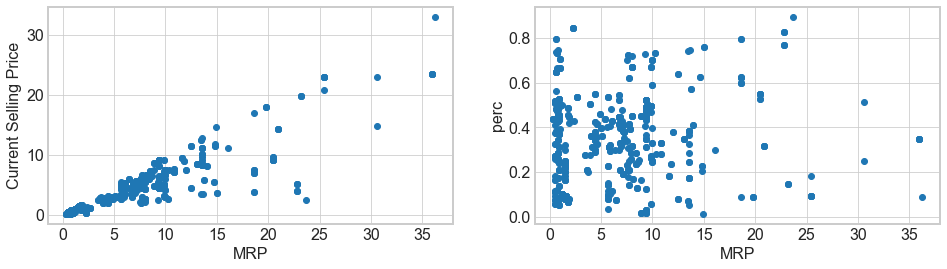

In [75]:
# your code here
fig, (ax2, ax1) = plt.subplots(1,2, figsize=(16, 4))
ax1.scatter(cars["MRP"], cars["perc"],label='data points')
ax1.set_xlabel('MRP')
ax1.set_ylabel('perc')
#ax1.legend()

ax2.scatter(cars["MRP"], cars["Current_Selling_Price"],label='data points')
ax2.set_xlabel('MRP')
ax2.set_ylabel('Current Selling Price')
#ax2.legend()




There is a linear relationship between MRP and current selling price but there doesn't seem to be any relationship with perc

c)

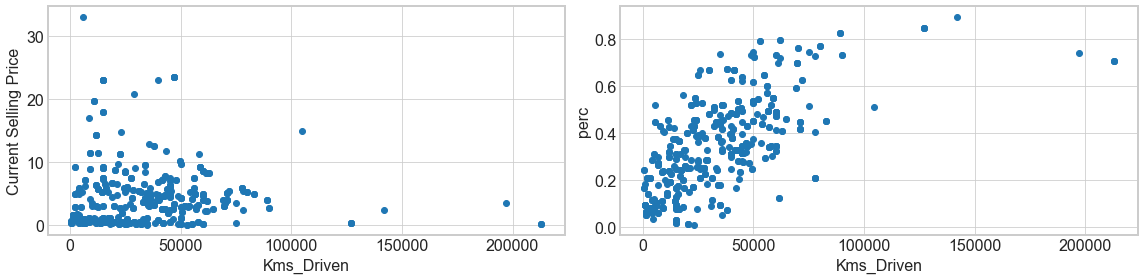

In [76]:
# your code here
fig, (ax2, ax1) = plt.subplots(1,2, figsize=(16, 4))
ax1.scatter(cars["Kms_Driven"], cars["perc"],label='data points')
ax1.set_xlabel('Kms_Driven')
ax1.set_ylabel('perc')
#ax1.legend()

ax2.scatter(cars["Kms_Driven"], cars["Current_Selling_Price"],label='data points')
ax2.set_xlabel('Kms_Driven')
ax2.set_ylabel('Current Selling Price')
#ax2.legend()


fig.tight_layout()

d)

There may be a non-linear relationship between Kms_driven and perc (maybe log?), but there is definitely a positive correlation.

Year is the best predictor of perc which is also the best predictor of current selling price. Kilometers may also a good predictor.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>4.2
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Yes but you could use both, please check the solution for d)
</span></div>
</div>

<div class='exercise-r'>  
 
**4.3** Perform additional EDA
 
 Use other plots and statistics to find the best predictor and/or understand the relationship between the other variables and `perc`. One example is given below. It is a plot of `perc` vs `Year` that is color coded based on the `Kms_Driven`.
 
 </div>

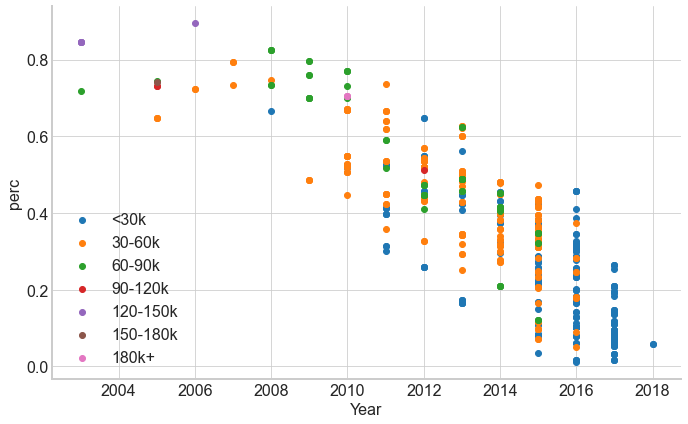

In [77]:
#example code
newdf = cars.copy()

newdf['bins'] = np.int64(newdf.Kms_Driven/30000)

bins = newdf.bins.unique()

bins.sort()

fg = sns.FacetGrid(data= newdf, hue = 'bins',hue_order = bins,
                  height = 6, aspect = 1.61)
fg.map(plt.scatter, 'Year','perc')
plt.legend(['<30k','30-60k','60-90k','90-120k','120-150k','150-180k','180k+'],loc='lower left');

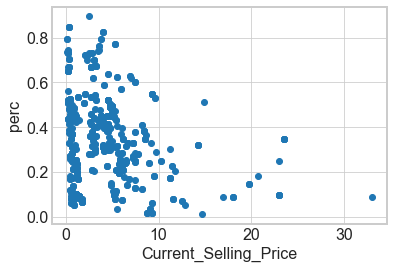

In [78]:
def EDA(x, y, x_label = None, y_label = None):
    plt.figure()
    plt.scatter(cars[x], cars[y])
    if x_label:
        plt.xlabel(x_label)
    else:
        plt.xlabel(x)
    if y_label:
        plt.ylabel(y_label)
    else:
        plt.ylabel(y)
EDA('Current_Selling_Price', 'perc') # MRP

There is a slight negative correlation between current selling price and precentage deprecation. Not as strong as Kms driven or year though. This implies that if the current selling price is very high, it is more likely that the precentage of deprecation is low, which makes sense because if an car that is being sold for a lot of money has already deprecated a lot, it must have started out even more expensive. 

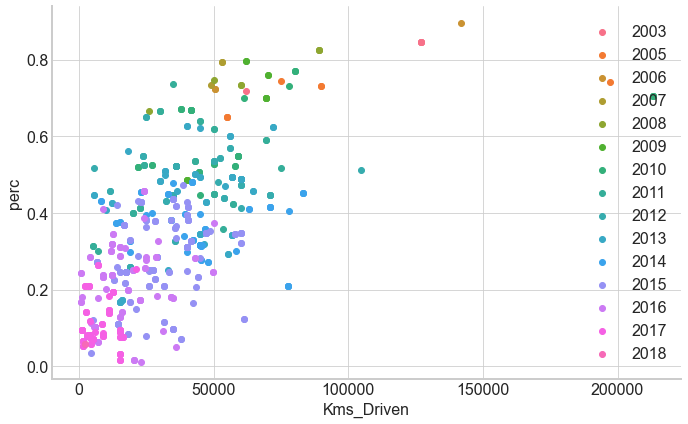

In [79]:
years = np.sort(cars['Year'].unique())
fg = sns.FacetGrid(data= cars, hue = 'Year', height = 6, aspect = 1.61, hue_order = years)
fg.map(plt.scatter, 'Kms_Driven','perc')
plt.legend(years, loc = 'right');

The above graph shows the same data as the provided example but with the hue and x axes switched. It seems that since kms driven and year correlated, I am not sure how useful using both will be.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>4.3
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Very good!
</span></div>
</div>

<div class='exercise-r'>  
 
**4.4** Fitting a Linear Regression model
 
 Based on the previous EDA choose appropriate **feature** variable(s) and **response** variable (`perc`).
 
 - Again, use the same split train-test sets with training data of 75% and testing data of 25%
 - Fit a Linear Regression model for each of the predictors.
 - Predict the model for the train and test data
 - Plot a graph with the test data with predictor variable on the *x* axis and `perc` on the *y* axis. Also plot the fit curve. Ensure you use the correct labels and show the legend.
 - Report the $MSE$ score from the training and test sets.
 - Find the best model i.e. the best predictor based on the $MSE$ of each model.
 
 </div>

In [80]:
# your code here
# split up the data
def lin_model(x, y):
    x_train, x_test, y_train, y_test = train_test_split(cars[[x]], cars[y], train_size = 0.75,
                                                   random_state = 109)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    plt.figure()
    plt.plot(x_train, y_pred_train, label = "Train Pred")
    plt.scatter(x_train, y_train, label = "Train Data")
    plt.plot(x_test, y_pred_test, 'g', label = "Test Pred")
    plt.scatter(x_test, y_test, label = "Test Data")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()
    
    MSE_train = mean_squared_error(y_test, y_pred_test)
    MSE_test = mean_squared_error(y_train, y_pred_train)
        
    print(f"Using {x} as a predictor, the MSE on the test data "
          f"is {MSE_test:.2f}, and the MSE on the train data "
          f"is {MSE_train:.2}.")
    return model

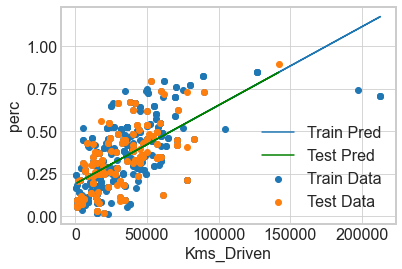

Using Kms_Driven as a predictor, the MSE on the test data is 0.02, and the MSE on the train data is 0.019.


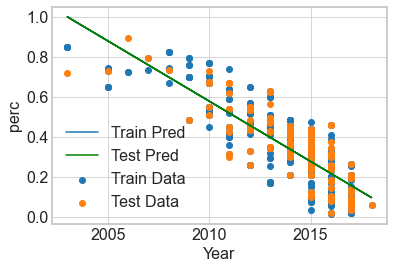

Using Year as a predictor, the MSE on the test data is 0.01, and the MSE on the train data is 0.0099.


In [81]:
# your code here
kms_perc_model = lin_model('Kms_Driven', 'perc')
year_perc_model = lin_model('Year', 'perc')

In [31]:
# your code here


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>4.4
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Very good!
</span></div>
</div>

Year is a better predictor than kms driven

<div class='exercise-r'>  
 
**4.5** Predicting The Current Selling Price using ```perc```
 
 After performing the above analysis, answer briefly as to why are we getting such a dramatic increase in the R2 score.
 
 </div>

In [82]:
# your code here
B0 = year_perc_model.intercept_
B1 = year_perc_model.coef_

#combine the two equations we have to calucuate percent deprecation 
#to get a new way to predict CSP 
#perc = (mrp-selling)/mrp and perc = B1*year+B0
csp_pred = -(B0+B1*cars['Year'])*cars['MRP']+cars['MRP']

#calculate the R^2 term
R2 = r2_score(cars['Current_Selling_Price'], csp_pred)

print(f"My new model gives an R^2 of {R2:.2f}, while using only MRP, as in problem 3.1, gives an R^2 of only 0.81")

My new model gives an R^2 of 0.96, while using only MRP, as in problem 3.1, gives an R^2 of only 0.81


The new model is a linear regression that also includes an interaction term between year and MRP. 
We likely could have done this without using the perc equations and just directly fit an equation such as 

CSP = B0 + B1\*MRP + B2\*Year + B3\*MRP\*Year

but using the perc variable gives a more real-world tie-in between the two variables.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>4.5
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Very good!
</span></div>
</div>

<div class="theme"> Part Β :  Multi-Linear Regression</div> 

### Problem Description: 

Analysis of publically available profiles on simplymarry.com to learn more about the biases, income disparity & other interesting trends in India. 

#### Dataset

The dataset was aggregated from the SimplyMarry.com site and given in `Income_prediction.csv'.

All the attributes refer to traits and preferences of the person looking for a spouse. 

- **age** - Age of person looking for a spouse
- **gender** - Female:0, Male:1 
- **height** - Height in inches
- **bmi** - BMI calculated based on height and weight
- **eating** - {'Doesn't Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4}
- **family_type** - ('Doesn't Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family both parents': 2, 'Joint family only mother':2, 'Joint family father mother and brothers sisters':2, 'Joint family single parent brothers and or sisters':2, 'Joint family only father': 2)
- **status** - If social status matters to the person looking for a spouse: {'Doesn't Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4}
- **manglik** - {'No': 0, 'Yes': 1, 'Do Not Know': 2} ([More on this feature](https://en.wikipedia.org/wiki/Mangala_Dosha))
- **drinking** - {'Doesn't Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3}
- **complexion** - {'Very Fair ': 1, 'Fair ': 2, 'Wheatish ':3, 'Wheatish Medium ': 4, 'Dark':5}
- **body** - {'Slim': 1, 'Average': 2, 'Heavy': 3, 'Athletic': 4}
- **education** - {'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4}
- **city** - ('International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12)
- **income** - {Annual income in dollars}

*source: Harvard IACS*

#### Sensitive attributes in the data

It is thought that users are mostly sincere when stating their preferences about their desired partner, and are less likely to hide any deeply held cultural or sociological biases or preferences in order to be perceived as being politically or socially "correct". This might take care of the problem with surveys where responses touching on social norms are notorious for self-report bias, referred to as "social desirability bias." However, the possibility of bias persists; it might be possible to imagine somebody selecting that drinking "doesn't matter" but they might still have some type of preference, unconscious or conscious. 

This is a dataset designed to help us think about issues of bias and social issues in datasets. We hope that you will be able to derive insights into the above mentioned sociological biases. The data could potentially provide answers to interesting questions with associated policy ramifications, such as a possible relationship between bias and factors like education, local environment, or age.


<div class='exercise'><b> Question 5:   Using Data science to learn more about Indian society [25 pts]</b>

First we are going to use simple analytics to learn more about Indian society with the help of this dataset.

The idea is to use basic modeling based on averages & sample distributions to uncover suspected biases, such as gender, skin tone & manglik status.

Answer the below questions using plots & simple statistics.

**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate clearly.

**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? It is possible to consider skin complexion as an ordinal variable; consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order. 

**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?

**5.4** Is there a clear trend between BMI and the income?

**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the "gender" variable available in this dataset?

**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?

**5.7** Is the income lower or high for those living in 'nuclear' families?

**5.8** What is the average effect of the 'Manglik' variable on income?
    
</div>

### Solutions

<div class='exercise-r'>  
 
**5.1** Is there a disparity in income of participants by gender? Consider using a log scale or another technique to communicate clearly.
 
 </div>

In [83]:
#import and clean up the data
df_2 = pd.read_csv('data/Income_prediction.csv')
df_2.columns

def rename_var(df, col, var_dict):
    new = 'n_' + col
    df[new] = df[col]
    for key,val in var_dict.items():
        df.loc[df[col]==val,new] = key
    return df

df_2 = rename_var(df_2, 'gender', {'female':0, 'male':1})
df_2 = rename_var(df_2, 'eating', {'Doesnt Matter':0, 'Jain': 1, 'Vegetarian': 2, 'Vegetarian With Eggs': 3, 'Non Vegetarian': 4})
df_2 = rename_var(df_2, 'status', {'Doesnt Matter': 0, 'Middle Class': 1, 'Upper Middle Class': 2, 'High Class': 3, 'Rich / Affluent': 4})
df_2 = rename_var(df_2, 'manglik', {'No': 0, 'Yes': 1, 'Do Not Know': 2})
df_2 = rename_var(df_2, 'drinking', {'Doesnt Matter':0, 'No': 1, 'Occasionally': 2, 'Yes': 3})
df_2 = rename_var(df_2, 'complexion',{'Very Fair ': 1, 'Fair ': 2, 'Wheatish ':3, 'Wheatish Medium ': 4, 'Dark':5})
df_2 = rename_var(df_2, 'education',{'High School':0, 'Some college':1,'Undergrad':2, 'Grad':3, 'Doctorate':4})
df_2 = rename_var(df_2, 'city',{'International': 1, 'Mumbai': 2, 'Delhi':3, 'Kolkata':4,'Bengaluru':5, 'Chennai':6, 'Hyderabad':7, 'Pune':8, 'Ahmedabad':9,'Surat':10, 'Vishakapatnam':11, 'Others':12})
df_2 = rename_var(df_2, 'family_type',{'Doesnt Matter': 0, 'Others':3, 'Nuclear': 1, 'Joint family': 2})

/Users/oluwatosinalliyu/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


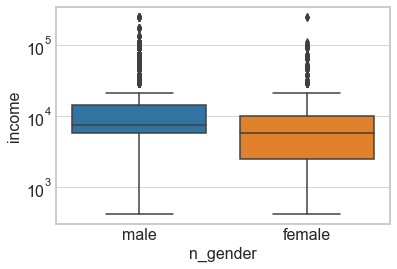

In [87]:
f, ax = plt.subplots()
ax.set(yscale = 'log')
sns.boxplot(data=df_2, x = "n_gender", y = "income", ax = ax)
f.show()


There seems to be somewhat of an income disparity. Generally each of the quartiles is lower for women than for men, there are more women below 10^4 than men, while there are more men making over 10^4 than women.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>5.1
</span></div><div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Very good!
</span></div></div>

<div class='exercise-r'>  
 
**5.2** Is there a relationship between income and the "eating" variable? Is there a relationship between income and skin complexion? It is possible to consider skin complexion as an ordinal variable; consider whether retaining this ordering as in the dataset might be preferable to considering skin complexion as a categorical variable lacking order.
 
 </div>

No handles with labels found to put in legend.
/Users/oluwatosinalliyu/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


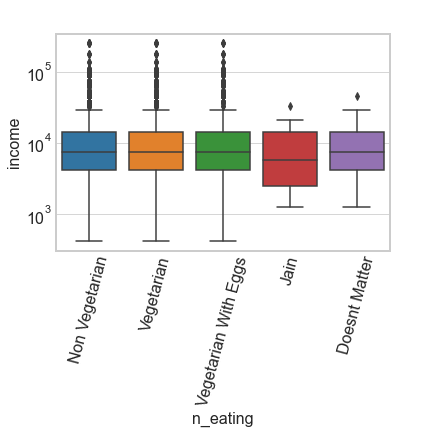

In [88]:
# your code here 
# your code here 
f, ax = plt.subplots()
ax.set(yscale = 'log')
g = sns.boxplot(data=df_2, x = "n_eating", y = "income", ax = ax)
g.set_xticklabels(g.get_xticklabels(), rotation = 75)
f.legend(loc = 'upper right')
f.show()

There is not a big difference in incomes between vegetarain, vegetarian with eggs, and non-vegetarians. "Doesn't matter" diets have a higher minimum income but the other quartiles seem the same. There are fewer outliers at a highe income though. 

The biggest difference is for Jain diets. The income spead is smaller- the minimim is higher than for most other diets but the median and maximum are both lower and there are fewer outliers. 

Text(0, 0.5, 'Income')

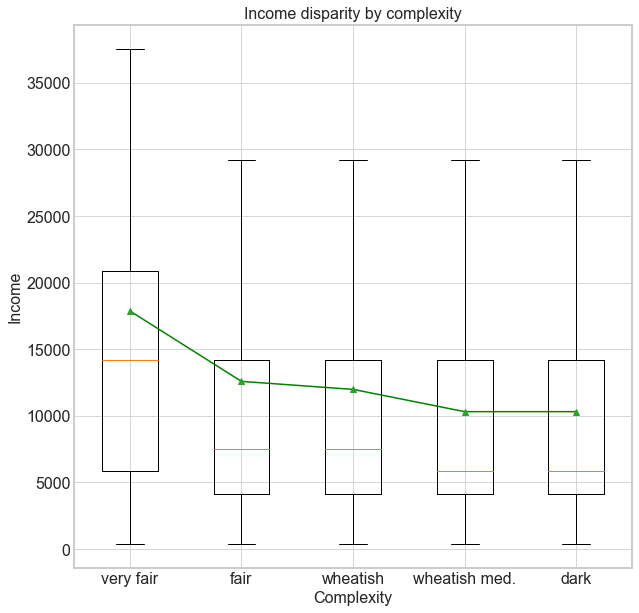

In [90]:
#f, ax = plt.subplots()
#ax.set(yscale = 'log')
#g = sns.boxplot(data=df_2, x = "n_complexion", y = "income", ax = ax)
#g.set_xticklabels(g.get_xticklabels(), rotation = 75)
#f.legend(loc = 'upper right')
#f.show()

vf_comp = df_2[df_2["complexion"] == 1]["income"]
f_comp = df_2[df_2["complexion"] == 2]["income"]
w_comp = df_2[df_2["complexion"] == 3]["income"]
wm_comp = df_2[df_2["complexion"] == 4]["income"]
d_comp = df_2[df_2["complexion"] == 5]["income"]
data1 = [vf_comp, f_comp, w_comp, wm_comp, d_comp]

pos1 = [1, 2, 3, 4, 5]
meanss1 = [vf_comp.mean(), f_comp.mean(), w_comp.mean(), wm_comp.mean(), d_comp.mean() ]

fig, ax1 = plt.subplots(figsize = (10,10))
ax1.boxplot(data1, sym='', labels=["very fair", "fair", "wheatish", "wheatish med.", "dark"], showmeans=True)
ax1.plot(pos1,meanss1,'-g' )
ax1.set_title('Income disparity by complexity')
ax1.set_xlabel('Complexity')
ax1.set_ylabel('Income')

Although the range and even the interquartile range is about the same for all complexions, the median gets higher and higher with lighter complexions. People with 'very fair' complexions have higher incomes in every quartile. 

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>5.2
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Very good
</span></div>
</div>

<div class='exercise-r'>  
 
**5.3** Is there a discernable trend in the incomes of participants from different regions/cities?
 
 </div>

Text(0, 0.5, 'Income')

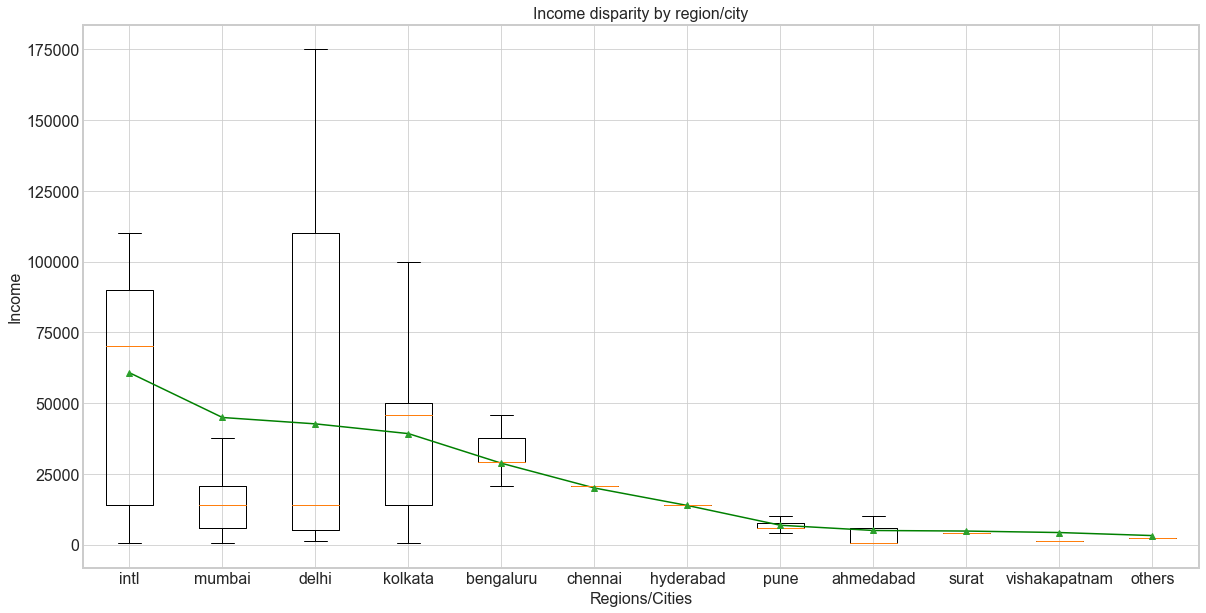

In [93]:
#f, ax = plt.subplots()
#ax.set()
#g = sns.barplot(data=df_2, x = "n_city", y = "income", ax = ax,
               #estimator = np.mean)
#g.set_xticklabels(g.get_xticklabels(), rotation = 75)
#f.legend(loc = 'upper right')
#f.show()

intl = df_2[df_2["city"] == 1]["income"]
mumbai = df_2[df_2["city"] == 2]["income"]
delhi = df_2[df_2["city"] == 3]["income"]
kolkata = df_2[df_2["city"] == 4]["income"]
bengaluru = df_2[df_2["city"] == 5]["income"]
chennai = df_2[df_2["city"] == 6]["income"]
hyderabad = df_2[df_2["city"] == 7]["income"]
pune = df_2[df_2["city"] == 8]["income"]
ahmedabad = df_2[df_2["city"] == 9]["income"]
surat = df_2[df_2["city"] == 10]["income"]
vishakapatnam = df_2[df_2["city"] == 11]["income"]
others = df_2[df_2["city"] == 12]["income"] 

data1 = [intl, mumbai, delhi, kolkata, bengaluru, chennai, hyderabad, pune, ahmedabad, surat, vishakapatnam, others]
pos = [1,2,3,4,5,6,7,8,9,10,11,12]
means = [intl.mean(), mumbai.mean(), delhi.mean(), kolkata.mean(), bengaluru.mean(), chennai.mean(), hyderabad.mean(), pune.mean(), ahmedabad.mean(), surat.mean(), vishakapatnam.mean(), others.mean()  ]
fig, ax = plt.subplots(figsize = (20,10))
ax.boxplot(data1, sym='', labels=["intl", "mumbai", "delhi", "kolkata", "bengaluru", "chennai", "hyderabad", "pune", "ahmedabad", "surat", "vishakapatnam", "others"], showmeans=True)
ax.plot(pos, means, '-g' )
ax.set_title('Income disparity by region/city')
ax.set_xlabel('Regions/Cities')
ax.set_ylabel('Income')


The graph indicates that the more rural the city is, the lower the income is.

Cities have a large difference in average income. There are many outliers for each city category so it is easier to interpret only looking at the mean or median and not the entire boxplot. 

'International', Bengaluru, Mumbai, Kolkata, and Deli have the highest mean incomes, wheras 'others', Surat, Vishakapatnam, and Ahmedabad have low mean incomes. Some areas have a much tighter distribution than others. 

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>5.3
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Very good study
</span></div>
</div>

<div class='exercise-r'>  
 
**5.4** Is there a clear trend between BMI and the income?
 
 </div>

the number of people in each bin:


/Users/oluwatosinalliyu/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


bmi_bin
3        4
4      140
5      856
6     3238
7     5193
8     2343
9      447
10     105
11      24
12       4
13       1
Name: age, dtype: int64

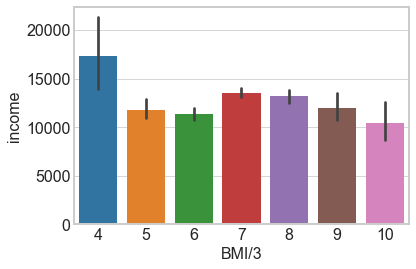

In [95]:
f, ax = plt.subplots()
ax.set()
#sort bmi into bins
df_2['bmi_bin'] = np.int64(df_2['bmi']/3)
#drop the bins with too few people in them
df_mod = df_2.loc[(df_2.bmi_bin>3)&(df_2.bmi_bin<11)]
g = sns.barplot(data=df_mod, x = "bmi_bin", y = "income", ax = ax,
               estimator = np.mean)
ax.set_xlabel("BMI/3")
f.show()
print("the number of people in each bin:")
df_2.groupby(by='bmi_bin').count()['age']


Bins 3,11,12,and 13 have too few people in them to consider. It seems that there is not a very strong relationship between BMI and income, although it does seem like having a BMI of ~12 or between ~21-24 is correlated with a higher mean income.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>5.4
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Very good!
</span></div>
</div>

<div class='exercise-r'>  
 
**5.5** Does the level of education show a clear trend with income? Is the trend similar across both levels of the "gender" variable available in this dataset?
 
 </div>

/Users/oluwatosinalliyu/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


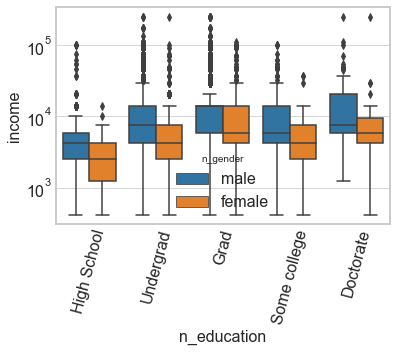

In [96]:
f, ax = plt.subplots()
ax.set(yscale = 'log')
g=sns.boxplot(data=df_2, x = "n_education", y = "income", ax = ax,
           hue = 'n_gender')
g.set_xticklabels(g.get_xticklabels(), rotation = 75)
f.show()

Having a higher level of education correlate with higher income for both women and men. For both genders there is not a big difference in income between people with some college and an undergraduate degree. In all cases, men earn more on average than women with the same education level.

*Had difficulties moving the legend. Would appreciate any insights.*

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>5.5
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Very good, I know you can put the legend box outside from the plot, you could have find how to do it easily on Google :) https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
</span></div>
</div>

<div class='exercise-r'>  
 
**5.6** Do any of the numeric attributes show a clear non-linear dependence with the amount of income?
 
 </div>

The older you are the more income you have


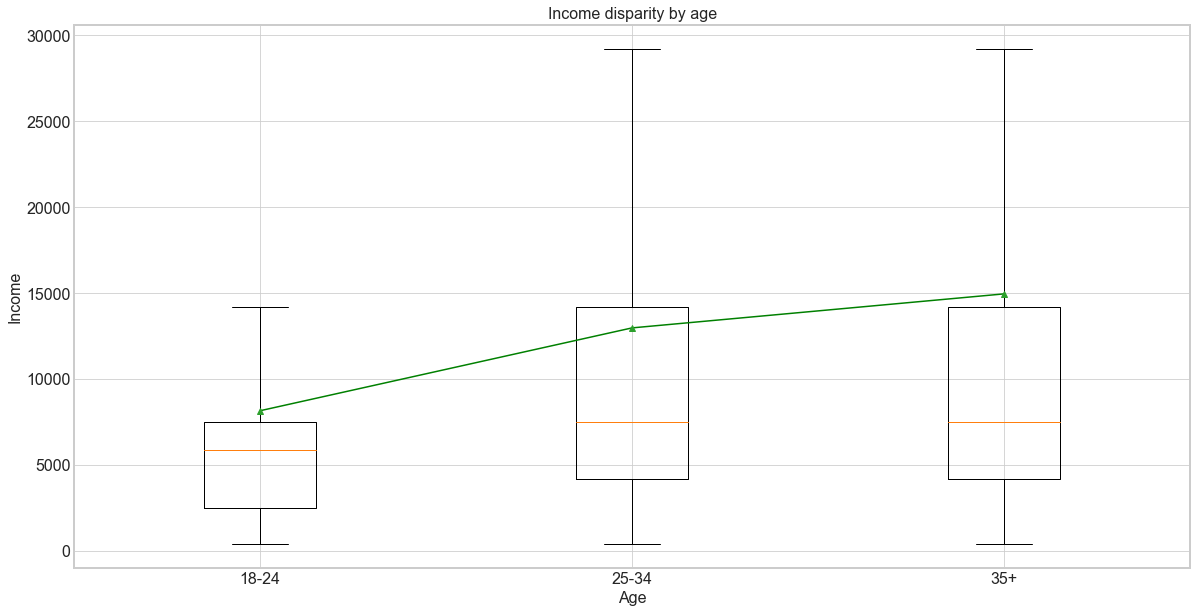

In [97]:
# your code here
newdf2 = df_2.copy()
bins = [18, 25, 35, np.inf]
names = ['18-24', '25-34', '35+']

newdf2['ageRange'] = pd.cut(df_2['age'], bins, labels=names)
#newdf2

first = newdf2[newdf2['ageRange'] =='18-24']['income']
second = newdf2[newdf2['ageRange'] =='25-34']['income']
third = newdf2[newdf2['ageRange'] =='35+']['income']

#n_bins = 3
#x = [first, second, third]
#colors = ['red', 'tan', 'lime']
#ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
#ax0.legend(prop={'size': 10})
#ax0.set_title('bars with legend')

data = [first, second, third]
pos = [1,2,3]
means = [first.mean(), second.mean(), third.mean()]
fig, ax = plt.subplots(figsize = (20,10))
ax.boxplot(data, sym='', labels=['18-24', '25-34', '35+'], showmeans=True)
ax.plot(pos, means, '-g' )
ax.set_title('Income disparity by age')
ax.set_xlabel('Age')
ax.set_ylabel('Income')

print(f'The older you are the more income you have')



The taller you are the more income you have


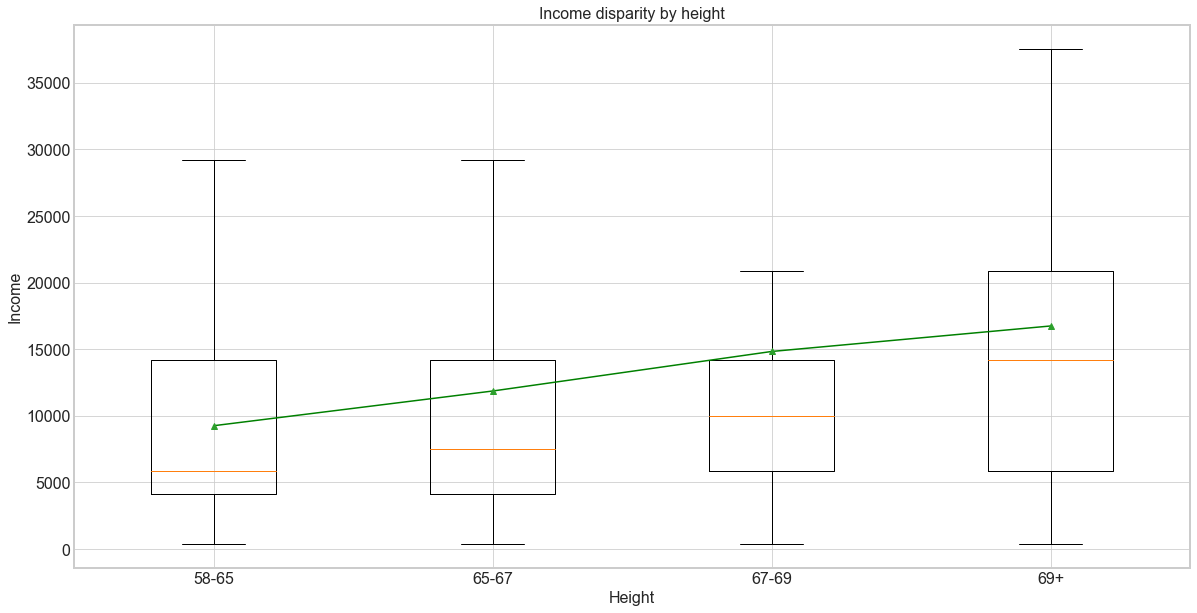

In [98]:
# your code here
df_2["height"].describe()

newdf2 = df_2.copy()
bins = [58, 65, 67, 69, np.inf]
names = ['58-65', '65-67', '67-69', '69+']

newdf2['heightRange'] = pd.cut(df_2['height'], bins, labels=names)

first = newdf2[newdf2['heightRange'] =='58-65']['income']
second = newdf2[newdf2['heightRange'] =='65-67']['income']
third = newdf2[newdf2['heightRange'] =='67-69']['income']
fourth = newdf2[newdf2['heightRange'] =='69+']['income']

data = [first, second, third, fourth]
pos = [1,2,3, 4]
means = [first.mean(), second.mean(), third.mean(), fourth.mean()]
fig, ax = plt.subplots(figsize = (20,10))
ax.boxplot(data, sym='', labels=['58-65', '65-67', '67-69', '69+'], showmeans=True)
ax.plot(pos, means, '-g' )
ax.set_title('Income disparity by height')
ax.set_xlabel('Height')
ax.set_ylabel('Income')

print(f'The taller you are the more income you have')


For age, there appears to be a non-linear relatioship, whereas height does have a linear relationship.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>5.6
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Good plots but you could make them nicer by for example using a smaller size or using seaborn, and please take the time to reflect on your plots.
</span></div>
<div class='alert alert-block alert-danger'><b>Deduction : </b><span style = 'color:black'>-1</span></div></div>

<div class='exercise-r'>  
 
**5.7** Is the income lower or high for those living in 'nuclear' families?
 
 </div>

Text(0, 0.5, 'Income')

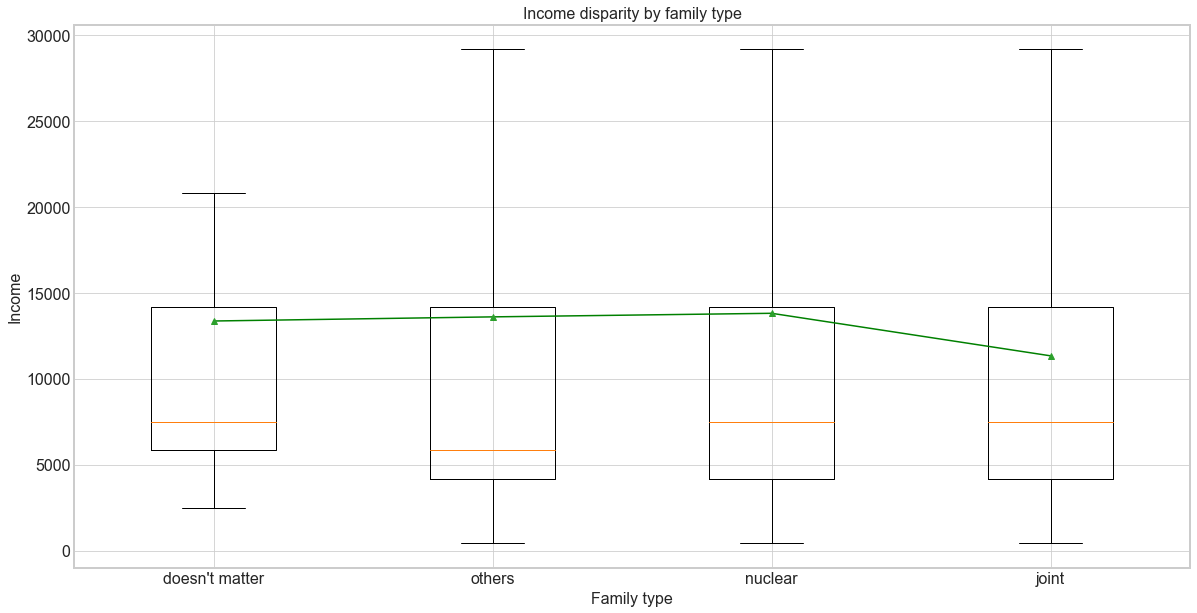

In [100]:
# your code here
dm = df_2[df_2["family_type"] == 0]["income"]
others = df_2[df_2["family_type"] == 3]["income"]
nuclear = df_2[df_2["family_type"] == 1]["income"]
joint = df_2[df_2["family_type"] == 2]["income"]



data1 = [dm, others, nuclear, joint]
pos = [1,2,3,4]
means = {'dm':dm.mean(), 'others':others.mean(), 'nuclear':nuclear.mean(), 'joint':joint.mean()}
fig, ax = plt.subplots(figsize = (20,10))
ax.boxplot(data1, sym='', labels=["doesn't matter", "others", "nuclear", "joint"], showmeans=True)
ax.plot(pos, list(means.values()), '-g' )
ax.set_title('Income disparity by family type')
ax.set_xlabel('Family type')
ax.set_ylabel('Income')

There is not a big difference in income between those living in nuclear families and those living in joint or 'other' families.

Using the median indicator, nuclear families make roughly the same sa hoint familes. However, if we use the mean, nuclear families are making more than other family types. 

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>5.7
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Good, straightforward. you could resize the plot and use seaborn for a nicer visual
</span></div>
</div>

<div class='exercise-r'>  
 
**5.8** What is the average effect of the 'Manglik' variable on income?
 
 </div>

/Users/oluwatosinalliyu/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


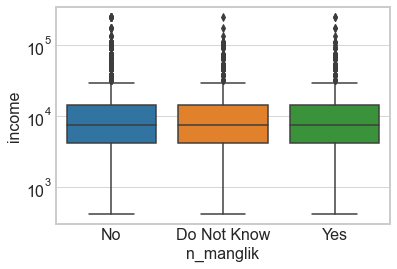

In [101]:
# your code here
f, ax = plt.subplots()
ax.set(yscale = 'log')
g=sns.boxplot(data=df_2, x = "n_manglik", y = "income", ax = ax)
f.show()

There is no effect of the 'Manglik' variable on income.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>5.8
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Please elaborate and justify your answer, you can have a look at the solution.
</span></div><div class='alert alert-block alert-danger'><b>Deduction : </b><span style = 'color:black'>-2</span></div></div>

<div class='exercise'><b> Question 6:  Calculate the Gini Index [15 pts]</b>


Gini coefficients are often used to quantify income inequality, read more [here](http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm).

The Gini coefficient is defined by the formula:

$G = \dfrac{ \sum_{i=1}^{n} (2i - n - 1) x_i}{n  \sum_{i=1}^{n} x_i}$

where $x$ is an observed value, $n$ is the number of values observed and $i$ is the rank of values in **ascending** order.

A Gini Index of 0 implies perfect income equality, whereas a gini index close to 1 implies a concentration of wealth among the richest few.

**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset

**6.2** Compare your gini index with other countries.

According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25. 

Based on your calculated Gini index value for this dataset, what is your conclusion on the relationship of the income disparity in the three countries?

Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?
    
</div>

### Solutions

<div class='exercise-r'>  
 
**6.1** Based on the above formula, calculate the Gini coffient for the income of the participants of this dataset
 
 </div>

In [102]:
#number of observations
n = df_2['income'].count()
sum_income = df_2['income'].sum()

#sort by income
df_sorted = df_2.sort_values(by='income').reset_index()

#assign a rank to each income
income_vals = df_sorted['income'].unique()
df_sorted['i'] = df_sorted.index
df_sorted['gini_num'] = (2*df_sorted['i'] - n - 1)*df_sorted['income']
gini_index = df_sorted['gini_num'].sum()/(n*sum_income)


print(f'The Gini index of this dataset is {gini_index:.2f}.')


The Gini index of this dataset is 0.50.


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>6.1
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Ok good
</span></div>
</div>

<div class='exercise-r'>  
 
**6.2** Compare your gini index with other countries.
 
 According to the [world bank estimate](https://www.indexmundi.com/facts/indicators/SI.POV.GINI/rankings) the gini index of South Africa is 0.6 while that of Ukrain is 0.25.
 
 Based on your calculated Gini index value for this dataset, what is your conclusion on the relationship of the income disparity in the three countries?
 
 Do the data source, self-report nature of the data, or sampling procedure affect your conclusions? If so, how?
 
 </div>

In comparison to South Africa, the wealth in India is a bit more distributed where those in lower income  groups have access to the wealth. However, SA seems to distribute more of its wealth to those in higher socio-economic status. Ukraine on the other hand has achieved a more equal wealth distribution in comparison to South Africa and India.

The data source does affect my conclusion mainly because of the high possibility of response bias and sampling bias by sourcing this data from a dating/marriage-matching site, we are only accounting for a niche subset of the population of India. More specifically, we are deriving the gini index from a relatively young population, who have the "luxury" of using a dating/marraige-matching site. Granted, there is a cultural context to this that may influence what type of users use these sort of sites. However, in the grand scheme of things, this data is not a robust representation of the indian population.

<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>6.2
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Very good job
</span></div>
</div>

<div class='exercise'><b> Question 7 (for 209a students, optional for others):  Multi-Linear Regression [10 pts]</b>

Now we increase the scope of our analysis to solve another problem that is related to income of the participants.
</div>

![](https://github.com/hargun3045/blog-dump/blob/master/modi.png?raw=true)

Owing to a large number of people underreporting their income to evade taxes, the Income Tax Department of India wants you, an esteemed data scientist, to build a machine learning model that can predict the income of a given tax-payer based on commonly available information.

This will help the department red flag suspected individuals who may show discernable trends of earing high values of income but are excessively under-reporting on their annual income.

The goal is to build the best model with the given dataset, using both categorical and continuous predictors that are available.

As with all other homework problems, this is a learning exercise; in the real world, it is your decision to choose the types of data science projects you will work on as well as which clients you will work with. 

Fit a multiple linear regression model to the training set.
Use the `sklearn` library.

#### Deliverables
Your code should be contained in a Jupyter notebook cell.  An appropriate level of comments is necessary.  Your code should run and output the required outputs described below.

#### Required Outputs
- Fit a multiple linear regression model on the training set
- Predict on train and test sets
- Calculate the MSE for the train & test set
- Report the $R^2$ score on the test set.
- Make a plot of Residuals vs Log of predicted values $\hat{y}$, with residuals on the $Y$-axis and predicted values on the $X$-axis. Use the formula ${\epsilon} = y - \hat{y}$ to compute the residual values. Include a horizontal line denoting the zero residual value on the $Y$-axis.
- Plot a histogram of the magnitudes of the residuals.

#### Optional Outputs
You are encouraged to experiment with ways to improve your model *after first reporting results with only the required outputs*. Some ideas are given below:
- Polynomial terms for continous variables
- Interaction terms between variables
- Feature selection among given predictors


0.25826520040457146 0.7162337579000011


(array([2.000e+00, 7.000e+00, 4.000e+01, 1.200e+02, 2.601e+03, 2.540e+02,
        4.700e+01, 1.400e+01, 2.000e+00, 2.000e+00]),
 array([-4.1533304 , -3.26499762, -2.37666483, -1.48833205, -0.59999926,
         0.28833352,  1.17666631,  2.06499909,  2.95333188,  3.84166466,
         4.72999745]),
 <BarContainer object of 10 artists>)

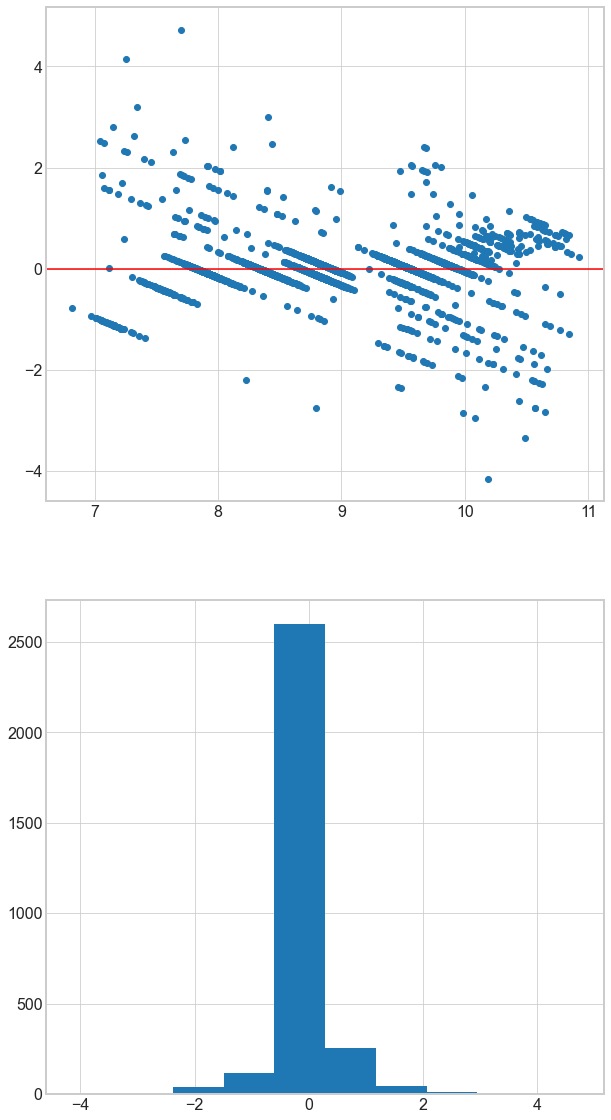

In [36]:
# your code here

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(df_2[['city']])
enc.categories_
one_hot_city =enc.transform(df_2[['city']]).toarray()

enc.fit(df_2[['drinking']])
enc.categories_
one_hot_drinking =enc.transform(df_2[['drinking']]).toarray()
#print(one_hot_drinking)

enc.fit(df_2[['body']])
enc.categories_
one_hot_body =enc.transform(df_2[['body']]).toarray()

enc.fit(df_2[['education']])
enc.categories_
one_hot_edu =enc.transform(df_2[['education']]).toarray()


df_3 = pd.DataFrame(one_hot_city, columns = ['International','Mumbai', 'Delhi', 'Kolkata','Bengaluru', 'Chennai', 'Hyderabad', 'Pune', 'Ahmedabad','Surat', 'Vishakapatnam', 'Others'])
df_4 = pd.DataFrame(one_hot_drinking, columns = ["Doesn't Matter","No", "Occasionally", "Yes"])
df_5 = pd.DataFrame(one_hot_body, columns = ["Slim", "Average", "Heavy", "Athletic"])
df_6 = pd.DataFrame(one_hot_edu, columns = ["High School", "Some college", "Undergrad", "Grad", "Doctorate"])
                    
result = pd.concat([df_2, df_3, df_4, df_5, df_6], axis=1, sort=False)

col1 = ["age", "complexion", "gender","height","complexion"]
col2 = ['International','Mumbai', 'Delhi', 'Kolkata','Bengaluru', 'Chennai', 'Hyderabad', 'Pune', 'Ahmedabad','Surat', 'Vishakapatnam', 'Others']
col3 = ["Doesn't Matter","No", "Occasionally", "Yes"]
col4 = ["Slim", "Average", "Heavy", "Athletic"]
col5 = ["High School", "Some college", "Undergrad", "Grad", "Doctorate"]

cols = col1 + col2 + col3 + col4 +col5

final_model = []


x = result[cols]
y = np.log(result["income"])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, test_size=0.25,random_state=200)

model = LinearRegression()
model.fit(x_train, y_train)

#predict on test & train set
y_pred_test = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r_sq_test = r2_score(y_test, y_pred_test)

print(mse_test, r_sq_test)

    

resi = y_test - y_pred_test
fig, (ax, ax0) = plt.subplots(2,1,figsize = (10,20) )
ax.scatter(y_pred_test,resi)
ax.axhline(y=0, color='r', linestyle='-')
ax0.hist(resi)


/Users/oluwatosinalliyu/opt/anaconda3/envs/cs109a/lib/python3.7/site-packages/ipykernel_launcher.py:62: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 1.0, 'How does MSE decrease with added variables?')

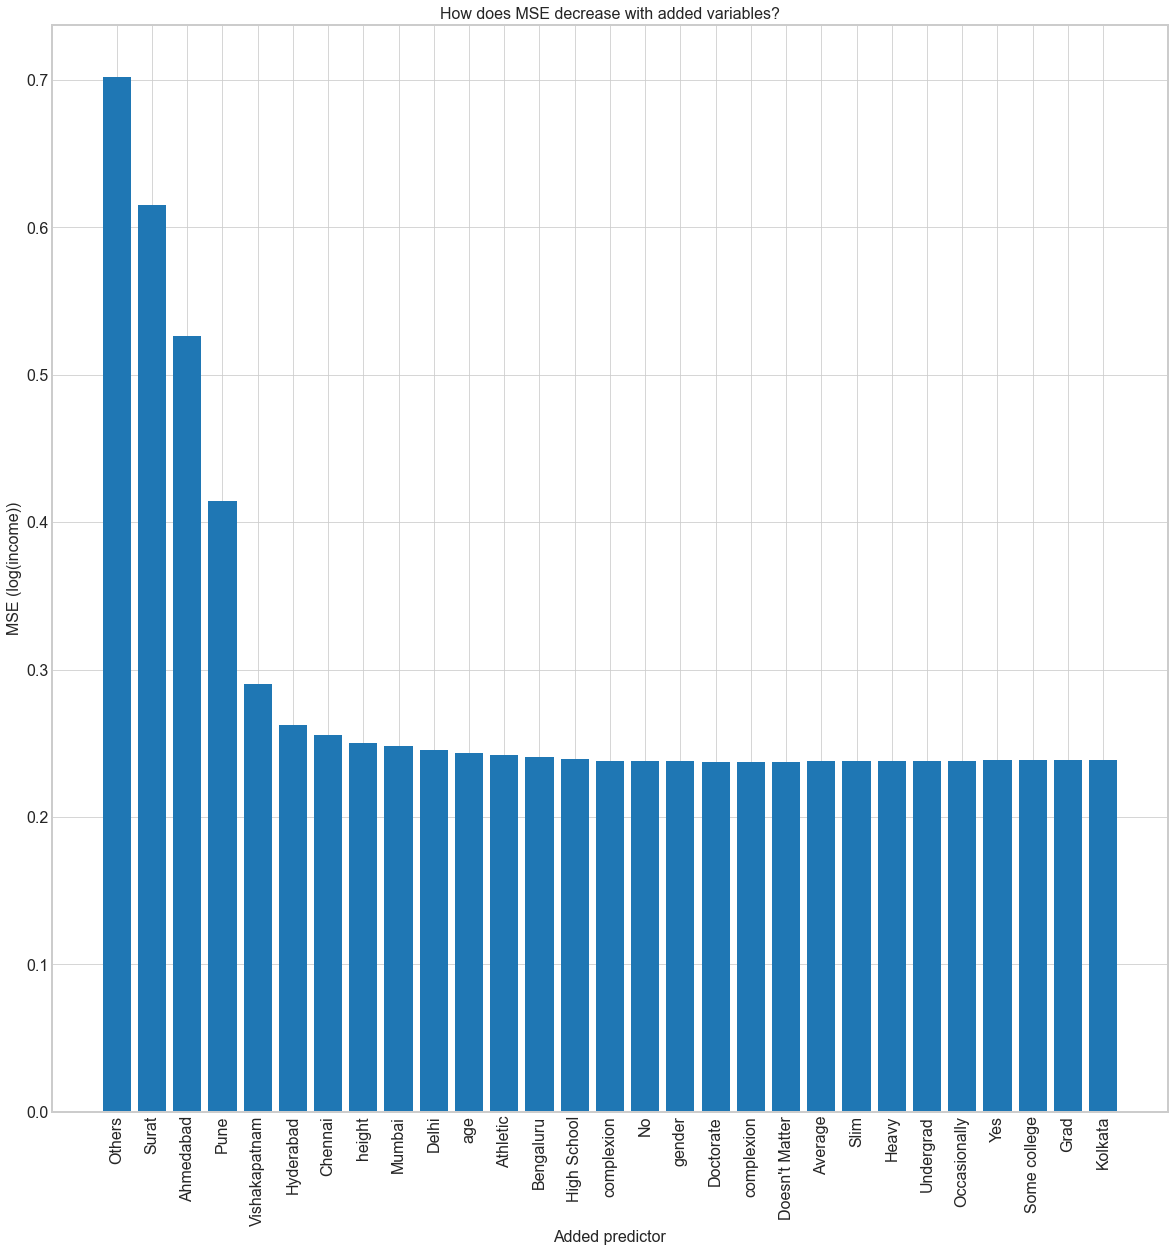

In [103]:
# your code here
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')
enc.fit(df_2[['city']])
enc.categories_
one_hot_city =enc.transform(df_2[['city']]).toarray()

enc.fit(df_2[['drinking']])
enc.categories_
one_hot_drinking =enc.transform(df_2[['drinking']]).toarray()
#print(one_hot_drinking)

enc.fit(df_2[['body']])
enc.categories_
one_hot_body =enc.transform(df_2[['body']]).toarray()

enc.fit(df_2[['education']])
enc.categories_
one_hot_edu =enc.transform(df_2[['education']]).toarray()


df_3 = pd.DataFrame(one_hot_city, columns = ['International','Mumbai', 'Delhi', 'Kolkata','Bengaluru', 'Chennai', 'Hyderabad', 'Pune', 'Ahmedabad','Surat', 'Vishakapatnam', 'Others'])
df_4 = pd.DataFrame(one_hot_drinking, columns = ["Doesn't Matter","No", "Occasionally", "Yes"])
df_5 = pd.DataFrame(one_hot_body, columns = ["Slim", "Average", "Heavy", "Athletic"])
df_6 = pd.DataFrame(one_hot_edu, columns = ["High School", "Some college", "Undergrad", "Grad", "Doctorate"])
                   
result = pd.concat([df_2, df_3, df_4, df_5, df_6], axis=1, sort=False)

col1 = ["age", "complexion", "gender","height","complexion"]
col2 = ['International','Mumbai', 'Delhi', 'Kolkata','Bengaluru', 'Chennai', 'Hyderabad', 'Pune', 'Ahmedabad','Surat', 'Vishakapatnam', 'Others']
col3 = ["Doesn't Matter","No", "Occasionally", "Yes"]
col4 = ["Slim", "Average", "Heavy", "Athletic"]
col5 = ["High School", "Some college", "Undergrad", "Grad", "Doctorate"]

cols = col1 + col2 + col3 + col4 +col5

model = []
model_mse = []

for i in range(len(cols)):
    MSE = {}
   
    for var in cols:
        test_model = model + [var]
        X = result[test_model]
        y = np.log(result['income'])
        x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 109)
        mod = LinearRegression()
        mod.fit(x_train,y_train)
        y_pred = mod.predict(x_test)
        MSE_val = mean_squared_error(y_test, y_pred)
        MSE[var] = MSE_val
   
    min_var = min(MSE, key = MSE.get)
    model.append(min_var)
    model_mse.append(MSE[min_var])
    cols.remove(min_var)
   
f, ax = plt.subplots(figsize = (20,20))
ax.bar(model, model_mse)
ax.set_xticklabels(model, rotation = 90)
ax.set_xlabel('Added predictor')
ax.set_ylabel('MSE (log(income))')
ax.set_title("How does MSE decrease with added variables?")

#print(mse_test, r_sq_test)

   

#resi = y_test - y_pred_test
#fig, (ax, ax0) = plt.subplots(2,1,figsize = (10,20) )
#ax.scatter(y_pred_test,resi)
#ax.axhline(y=0, color='r', linestyle='-')
#ax0.hist(resi)

The above code use a forward-selection method to find a multilinear model based on the variables in the dataset. First it finds the single variable that yields the lowest MSE, then cycles through the remaning variables to find the most impactful second variable to add to the model, and continues until it has added all available variables. The above graph shows the MSE of each model as variables are added. So the first column is with 'Others' only, the next colums is the model with 'Others + Surat', the third column is 'Others + Surat + Ahmedabad', etc.

Based on the above graph we decide to make a model with first 13 predictors and throw away the rest of them because they are not helping reduce the MSE much or at all. 10/13 chosen predictors are city categories, so clearly the city one lives in can be quite important in predicting income.

(array([1.000e+00, 9.000e+00, 3.800e+01, 1.140e+02, 2.654e+03, 2.060e+02,
        4.900e+01, 1.400e+01, 2.000e+00, 2.000e+00]),
 array([-4.21969834, -3.32036721, -2.42103608, -1.52170495, -0.62237382,
         0.27695731,  1.17628845,  2.07561958,  2.97495071,  3.87428184,
         4.77361297]),
 <BarContainer object of 10 artists>)

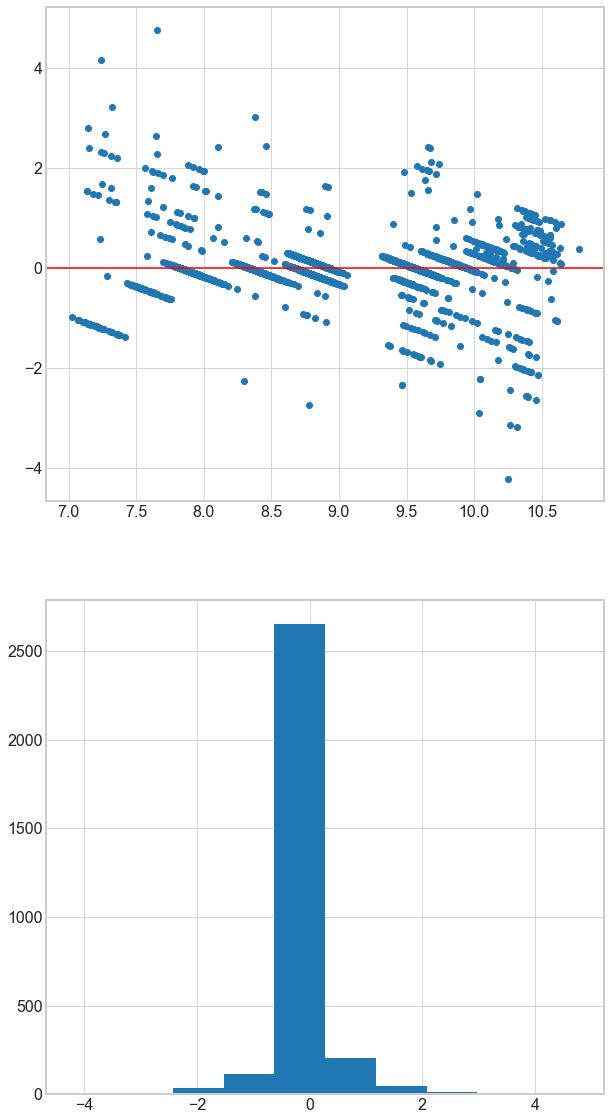

In [106]:
cols  = ['Others', 'Surat', 'Ahmedabad', 'Pune', 'Vishakapatnam', 'Hyderabad', 'Chennai', 'height',
        'Mumbai', 'Delhi', 'age', 'Athletic', 'Bengaluru']

x = result[cols]
y = np.log(result["income"])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, test_size=0.25,random_state=200)

model = LinearRegression()
model.fit(x_train, y_train)

#predict on test & train set
y_pred_test = model.predict(x_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r_sq_test = r2_score(y_test, y_pred_test)
   

resi = y_test - y_pred_test
fig, (ax, ax0) = plt.subplots(2,1,figsize = (10,20) )
ax.scatter(y_pred_test,resi)
ax.axhline(y=0, color='r', linestyle='-')
ax0.hist(resi)


In [108]:
print(f"The MSE of our model is {mse_test:.2f}; the R^2 value is {r_sq_test:.2f}. There is something interesting going on\
with the residual plot that indicates some non-lineartiy behavior.")

The MSE of our model is 0.26; the R^2 value is 0.72. There is something interesting going onwith the residual plot that indicates some non-lineartiy behavior.


<div class='alert alert-block' style='border-color:rgb(201, 201, 201); border-style:dashed; border-width: 3px'><div class='alert alert-block alert-primary'><b>Question : </b><span style = 'color:black'>7
</span></div>
<div class='alert alert-block alert-info'><b>Comments : </b><span style = 'color:black'>Great job! (Please read carefully the question as we asked for the code to be fit one cell, i.e. the answer should be condensed.)
</span></div>
</div>

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Graded by: Paul-Emile Landrin
</footer>